This project focuses on analyzing a Netflix dataset to uncover trends and insights related to content genres, popularity, and production patterns. Using Python libraries such as Pandas, Matplotlib, and Seaborn, we explore the most frequent genres, identify top-rated movies, track popularity by year, and discover which countries and years dominate Netflix’s catalog. The goal is to demonstrate how real-world data can be cleaned, visualized, and interpreted to extract meaningful conclusions.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [46]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## Data Exploration

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [48]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [49]:
#Checking for the duplicate movies
df.duplicated().sum()

np.int64(0)

In [50]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


### Exploration Summary
- We have a dataframe consisting of **9827 rows** and **9 columns**.
- Our dataset looks a bit tidy with no NaNs nor duplicated values.
- ```Release_Date``` column needs to be casted into date time and to extract only the year value.
- ```Overview```, ```Original_Languege``` and ```Poster_Url``` wouldn't be so useful during analysis, so we'll drop them.
- There is noticable outliers in ```Popularity``` column
- ```Vote_Average``` bettter be categorised for proper analysis.
- ```Genre``` column has comma saperated values and white spaces that needs to be handled and casted into category.

## Data Cleaning

In [51]:
#Changing Datatype of Release_Date Column
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [52]:
#Extracting the Year Value
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [53]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#### Dropping the Overview, Original_Language and Poster_Url Columns

In [54]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [55]:
df.drop(cols, axis = 1, inplace = True)

In [56]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


#### Categorizing ```Vote_Average``` Column
We would cut the ```Vote_Average``` values and make four categories: ```popular```, ```average```, ```below_avg``` and ```not_popular``` to describe it more using ```categorize_col()``` function.

In [57]:
def categorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [58]:
labels = ['not_popular', 'below_average', 'average', 'popular']

In [59]:
categorize_col(df, 'Vote_Average', labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [60]:
df['Vote_Average'].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [61]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular      2467
popular          2450
average          2412
below_average    2398
Name: count, dtype: int64

#### Removing NaN Values

In [62]:
df.dropna(inplace = True)

In [63]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [64]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


### Splitting the Genres
We would split the genres into a list and then explode our dataframe to have only one genre per row for each movie.

In [65]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)

In [66]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


#### Casting Genre column into category

In [67]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [69]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

## Data Visualization

In [70]:
sns.set_style('whitegrid')

### Most Frequent Genre of Movies released on Netflix

In [71]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

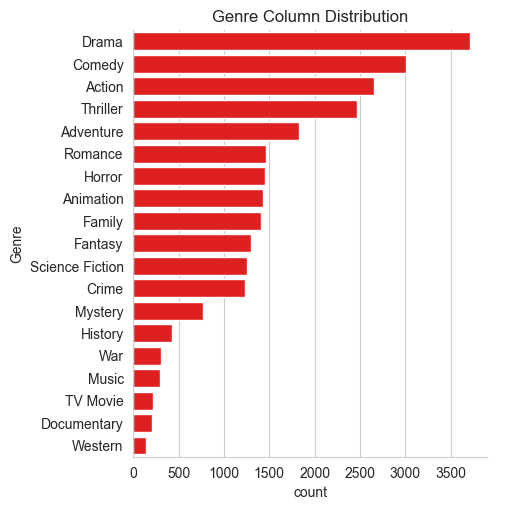

In [74]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = 'red')
plt.title('Genre Column Distribution')
plt.show()

### Highest Votes in ```Vote_Average``` Column

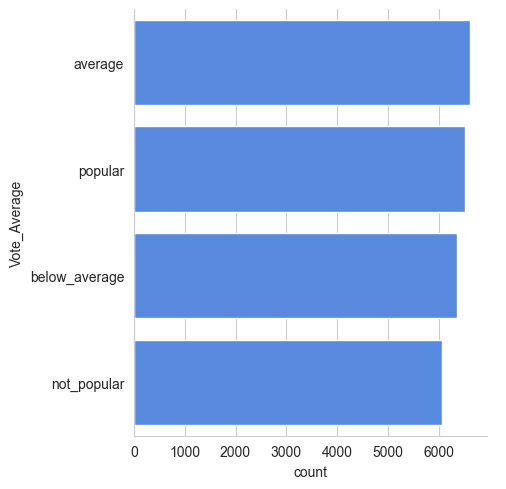

In [77]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
           order = df['Vote_Average'].value_counts().index,
           color = '#4285f5')
plt.show()

### Highest Popularity Movie with its Genre

In [79]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### Lowest Popularity Movie with its Genre

In [80]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


### Year with Most Movies

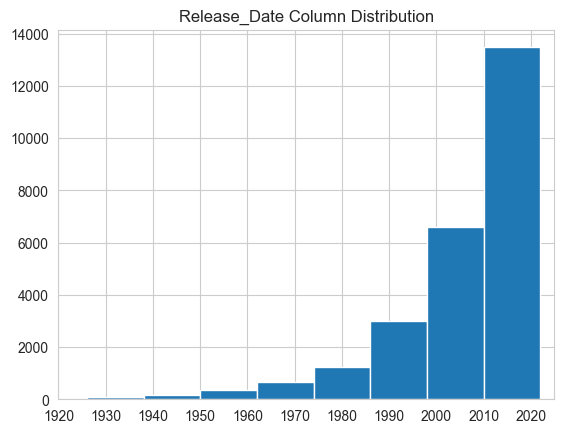

In [96]:
df['Release_Date'].hist(bins = 10)
plt.title('Release_Date Column Distribution')
plt.xlim(1920, 2025) 
plt.xticks(range(1920, 2030, 10))
plt.show()

## Conclusion

1. What is the most frequent genre in the dataset?<br>
Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

2. What genres has highest votes?<br>
We have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by being having more than 18.5% of movies
popularities.


3. What movie got the highest popularity? what's its genre?<br>
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Sience Fiction.


4. What movie got the lowest popularity? what's its genre?<br>
The united states, thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history.


5. Which year has the most filmmed movies?<br>
Year 2020 has the highest filmming rate in our dataset.